In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_Customer = pd.read_excel("/content/drive/MyDrive/DataGotTalend/Customer.xlsx")
df_Ticket = pd.read_excel("/content/drive/MyDrive/DataGotTalend/TicKet.xlsx")
df_Film = pd.read_excel("/content/drive/MyDrive/DataGotTalend/Film.xlsx")
df_Author = pd.read_excel("/content/drive/MyDrive/DataGotTalend/Author.xlsx")
df_Category = pd.read_excel("/content/drive/MyDrive/DataGotTalend/Category.xlsx")
df_Country = pd.read_excel("/content/drive/MyDrive/DataGotTalend/Country.xlsx")
df_Director = pd.read_excel("/content/drive/MyDrive/DataGotTalend/Director.xlsx")

# **Phân tích dữ lieu khách hàng**

In [ ]:
df_Customer.head(2)

,customerid,DOB,gender,job,industry,ThuocTinh1_Website,ThuocTinh2_Website,Age
0,0000000014,1999-04-18,Nữ,student,computer,KH0104,345.0,24.0
1,0000000034,1998-04-16,Nam,student,health service,KH0104,333.0,25.0


In [ ]:
df_Customer['gender'].value_counts()
df_counts = pd.DataFrame({'gender': df_Customer['gender'].value_counts().index, 'count': df_Customer['gender'].value_counts().values})
colors = ['lightcoral' if gender == df_Customer['gender'].value_counts().idxmax() else 'lightgrey' for gender in df_counts['gender']]

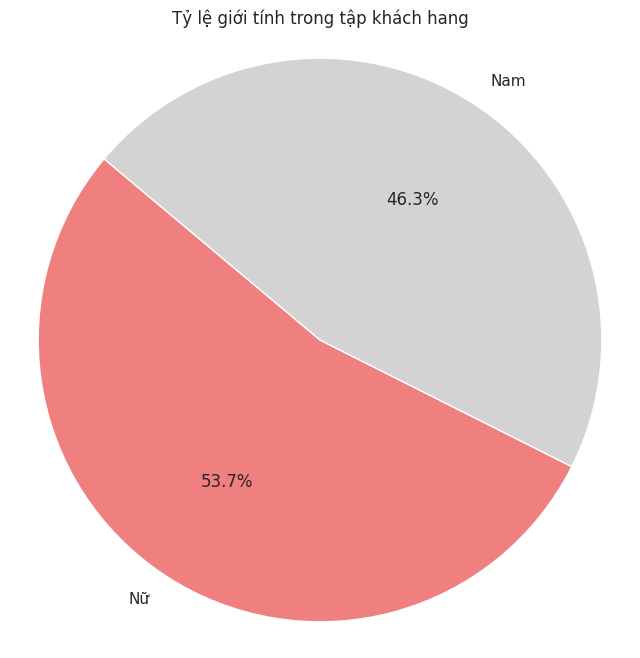

In [ ]:
plt.figure(figsize=(8, 8))
sns.set_palette("pastel")
sns.set(style="whitegrid")
plt.pie(df_counts['count'], labels=df_counts['gender'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Tỷ lệ giới tính trong tập khách hang')
plt.axis('equal')
plt.show()

In [ ]:
top2_genders = df_Customer['job'].value_counts().sort_values(ascending=False).head(2).index
df_counts = pd.DataFrame({'job': df_Customer['job'].value_counts().index, 'count': df_Customer['job'].value_counts().values})
colors = ['lightcoral' if job in top2_genders else 'lightgrey' for job in df_counts['job']]

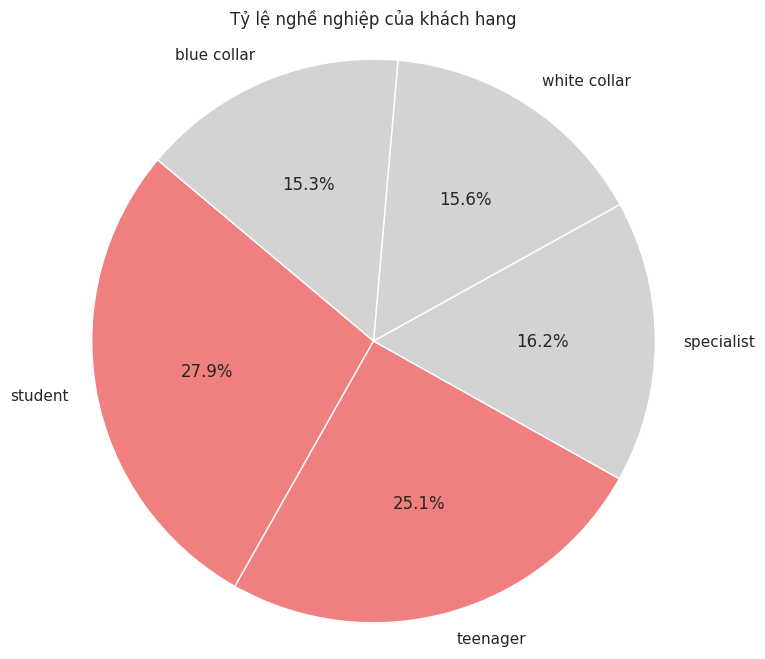

In [ ]:
plt.figure(figsize=(8, 8))
sns.set_palette("pastel")
sns.set(style="whitegrid")
plt.pie(df_counts['count'], labels=df_counts['job'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Tỷ lệ nghề nghiệp của khách hang')
plt.axis('equal')
plt.show()

In [ ]:
top2_genders = df_Customer['industry'].value_counts().sort_values(ascending=False).head(2).index
df_counts = pd.DataFrame({'industry': df_Customer['industry'].value_counts().index, 'count': df_Customer['industry'].value_counts().values})

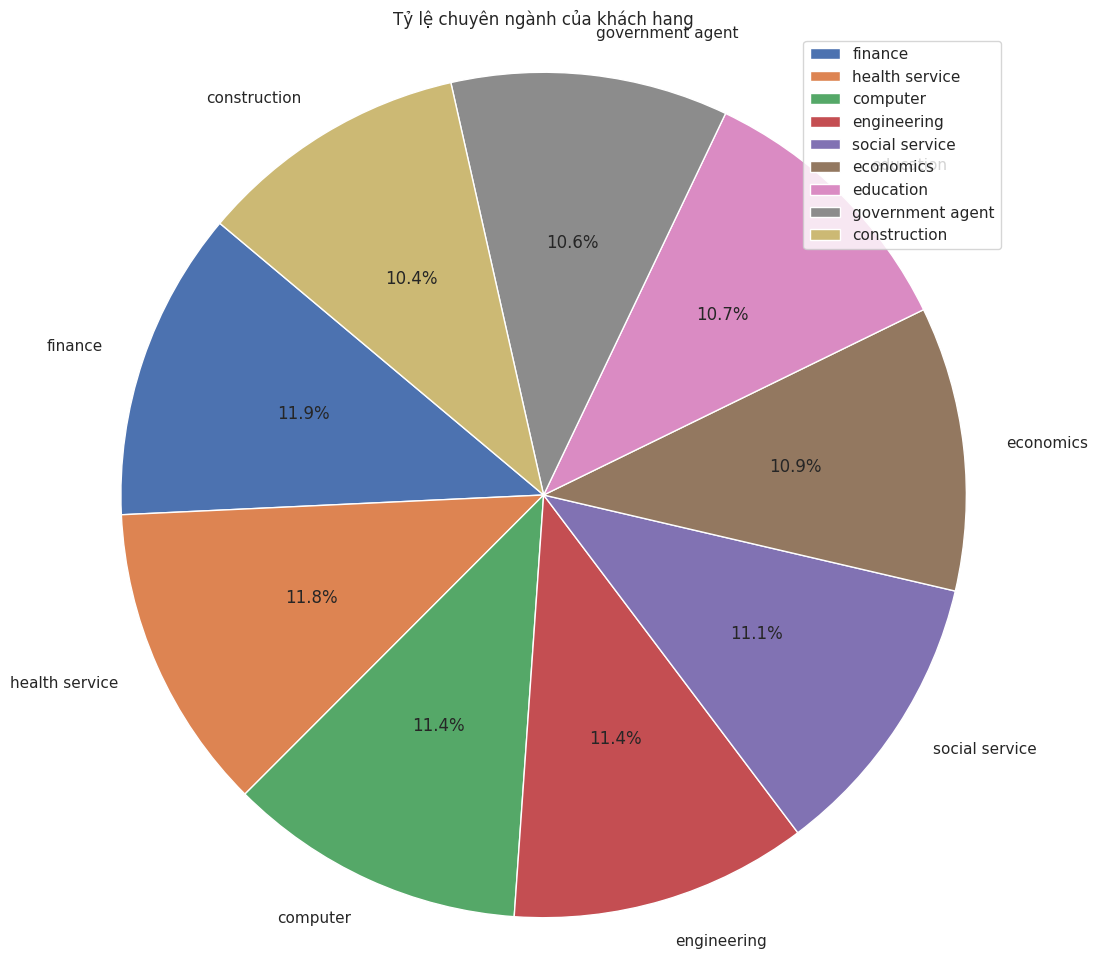

In [ ]:
plt.figure(figsize=(12, 12))
sns.set_palette("pastel")
sns.set(style="whitegrid")
plt.pie(df_counts['count'], labels=df_counts['industry'], autopct='%1.1f%%', startangle=140)
plt.title('Tỷ lệ chuyên ngành của khách hang')
plt.legend(loc="upper right")
plt.axis('equal')
plt.show()

In [ ]:
top2_genders = df_Customer['ThuocTinh1_Website'].value_counts().sort_values(ascending=False).head(1).index
df_counts = pd.DataFrame({'ThuocTinh1_Website': df_Customer['ThuocTinh1_Website'].value_counts().index, 'count': df_Customer['ThuocTinh1_Website'].value_counts().values})
colors = ['lightcoral' if ThuocTinh1_Website in top2_genders else 'lightgrey' for ThuocTinh1_Website in df_counts['ThuocTinh1_Website']]

In [ ]:
df_counts

,ThuocTinh1_Website,count
0,KH0104,3937
1,KHWEBS,3
2,KH,2
3,KH0107,1


<ipython-input-13-1455eddd7fb5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ThuocTinh1_Website', y='count', data=df_counts, palette='pastel')


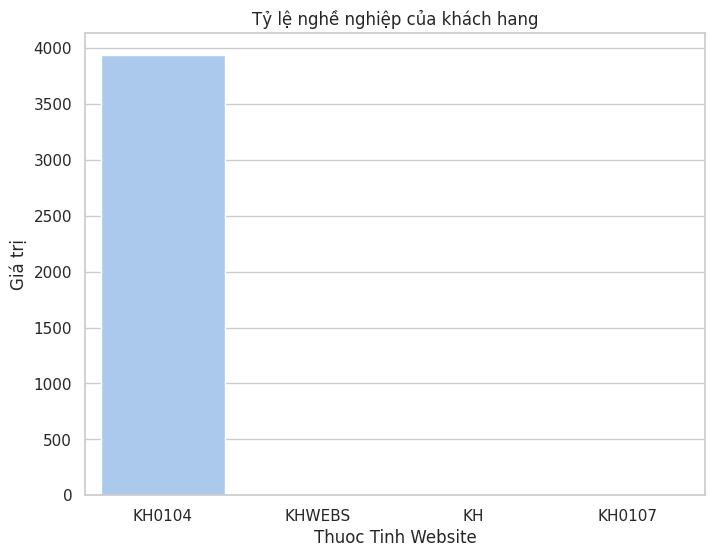

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='ThuocTinh1_Website', y='count', data=df_counts, palette='pastel')
plt.title('Tỷ lệ nghề nghiệp của khách hang')
plt.xlabel('Thuoc Tinh Website')
plt.ylabel('Giá trị')
plt.show()

In [ ]:
df_Customer['Age'][df_Customer['Age'] < 0 ]

482   -71.0
Name: Age, dtype: float64

In [ ]:
df_Customer['Age'][df_Customer['Age'] < 0] = np.NaN

<ipython-input-15-31eb4d30a71c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Customer['Age'][df_Customer['Age'] < 0] = np.NaN


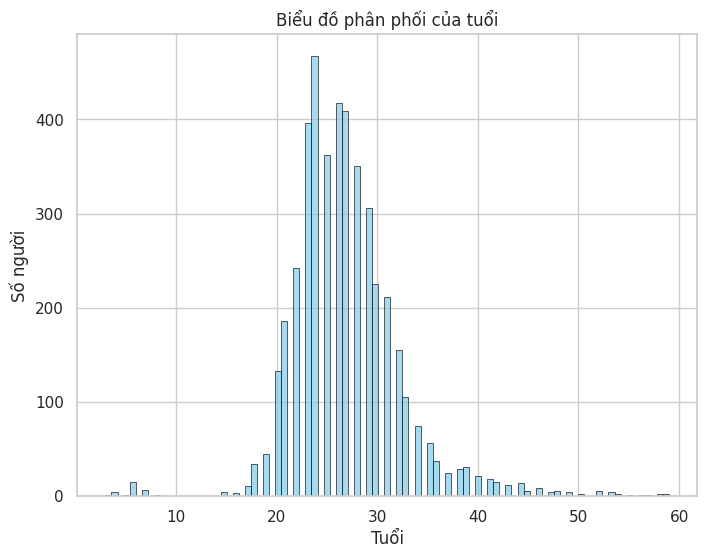

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df_Customer['Age'], color='skyblue', edgecolor='black')
plt.title('Biểu đồ phân phối của tuổi')
plt.xlabel('Tuổi')
plt.ylabel('Số người')
plt.show()

In [ ]:
len(df_Customer["ThuocTinh2_Website"].unique())

3910

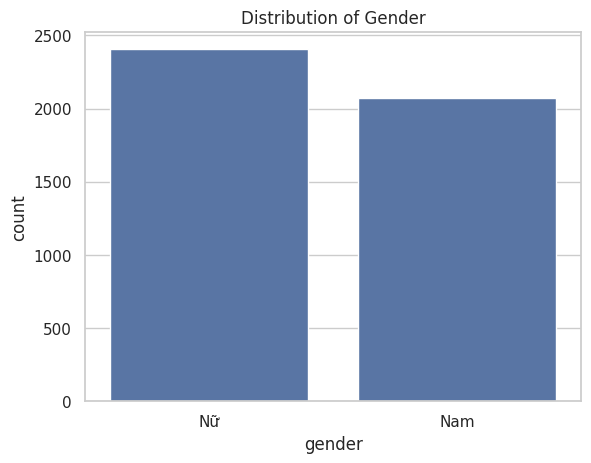

In [ ]:
sns.countplot(x='gender', data=df_Customer)
plt.title('Distribution of Gender')
plt.show()

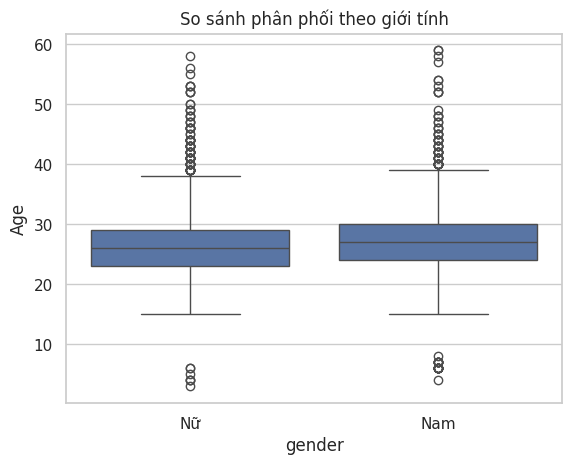

In [ ]:
sns.boxplot(x='gender', y='Age', data=df_Customer)
plt.title('So sánh phân phối theo giới tính')
plt.show()

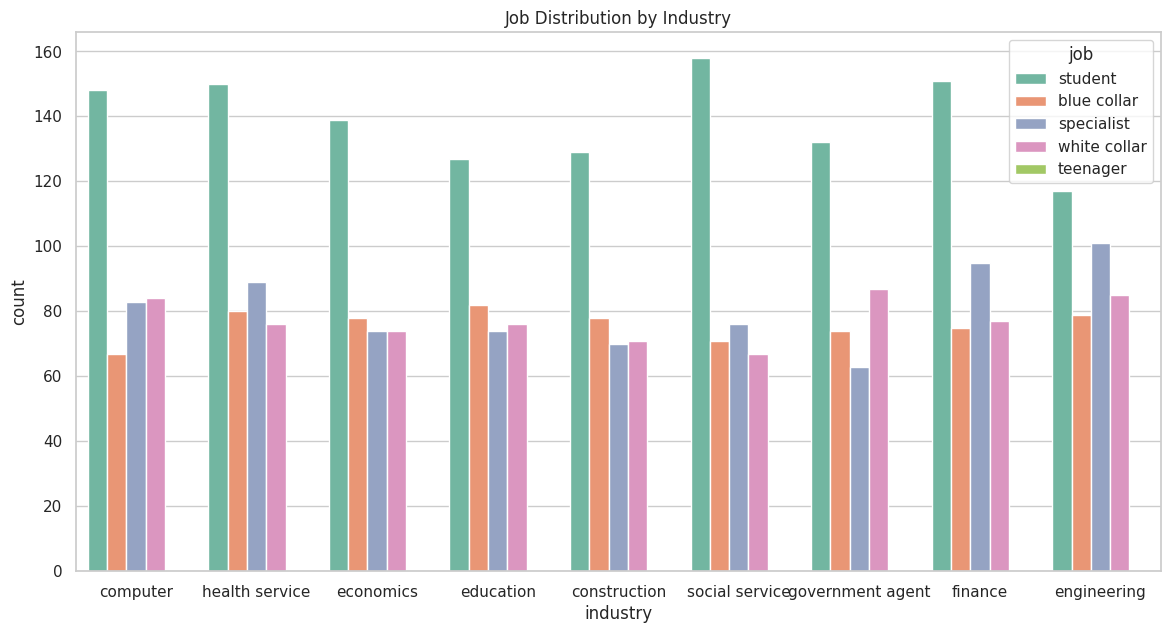

In [ ]:
plt.figure(figsize=(14, 7))
sns.countplot(x='industry', hue='job', data=df_Customer, palette='Set2')
plt.title('Job Distribution by Industry')
plt.show()

In [ ]:
wordcloud_customer = pd.read_excel("/content/drive/MyDrive/DataGotTalend/DATA SET - VÒNG 1 CUỘC THI DATA GOT TALENT 2023.xlsx",sheet_name="customer")

In [ ]:
wordcloud_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4479 entries, 0 to 4478
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerid  4479 non-null   object
 1   DOB         4479 non-null   int64 
 2   gender      4479 non-null   object
 3   address     4478 non-null   object
 4   Website     3943 non-null   object
 5   job         4479 non-null   object
 6   industry    3357 non-null   object
dtypes: int64(1), object(6)
memory usage: 245.1+ KB


In [ ]:
from wordcloud import WordCloud
from PIL import Image

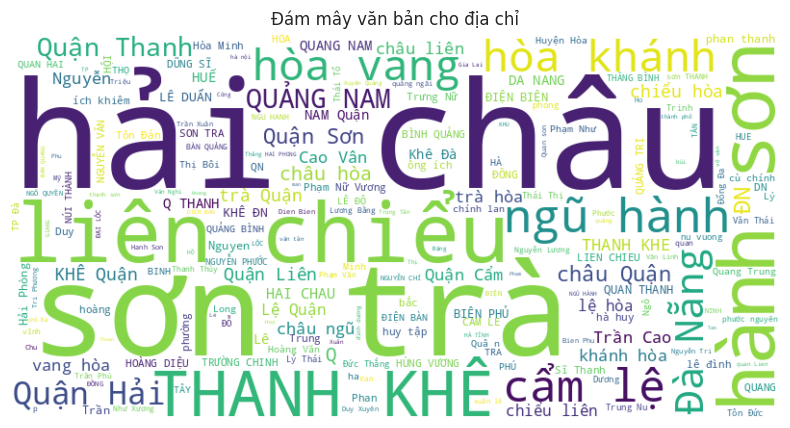

In [ ]:
text_data = ' '.join(wordcloud_customer['address'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Hiển thị Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Đám mây văn bản cho địa chỉ')
plt.show()

# **Phân tích dữ lieu Ticket**

In [ ]:
df_Ticket.head()

,orderid,cashier,saledate,total,customerid,ticketcode,date,time,slot,room,film,slot type,ticket type,ticket price,popcorn,numberticket,deltatime,day_of_week,week_of_month
0,10006052019B0225,emp002,2019-05-06 16:40:43,90000.0,0000000014,20074925,2019-05-06,18:15:00,G04,3,AVENGERS: HỒI KẾT,ĐƠN,Thành viên,45000,Không,2.0,1.571389,Monday,2
1,10006052019B0225,emp002,2019-05-06 16:40:43,90000.0,0000000014,20074924,2019-05-06,18:15:00,G03,3,AVENGERS: HỒI KẾT,ĐƠN,Thành viên,45000,Không,2.0,1.571389,Monday,2
2,10022052019B0167,emp011,2019-05-22 20:30:28,90000.0,0000000034,20097042,2019-05-22,20:45:00,E04,2,JOHN WICK 3: CHUẨN BỊ CHIẾN TRANH (C18),ĐƠN,Thành viên,45000,Không,2.0,0.242222,Wednesday,4
3,10022052019B0167,emp011,2019-05-22 20:30:28,90000.0,0000000034,20097041,2019-05-22,20:45:00,E03,2,JOHN WICK 3: CHUẨN BỊ CHIẾN TRANH (C18),ĐƠN,Thành viên,45000,Không,2.0,0.242222,Wednesday,4
4,10130052019B0141,emp005,2019-05-30 19:28:44,90000.0,0000000034,20106761,2019-05-30,19:30:00,F04,1,NGÔI ĐỀN KỲ QUÁI (C18),ĐƠN,Thành viên,45000,Không,2.0,0.021111,Thursday,5


In [ ]:
df_Ticket["ticket price"].sum()

1685755000

In [ ]:
df_Ticket["orderid"].count()

35378

In [ ]:
df_Ticket["saledate"].describe()

<ipython-input-28-9c145ffceca5>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_Ticket["saledate"].describe()


count                   35378
unique                  14544
top       2019-05-26 18:11:38
freq                       43
first     2019-05-01 07:05:53
last      2019-05-31 23:05:18
Name: saledate, dtype: object

**Tổng doanh thu trong tháng 5 tập dữ liệu là 1.685.755.000 VND với tổng số đơn đặt hàng là 35378**

In [ ]:
sample = df_Ticket['film'].value_counts().sort_values(ascending=False).head(10)
sample = pd.DataFrame({'film': sample.index, 'count': sample.values})

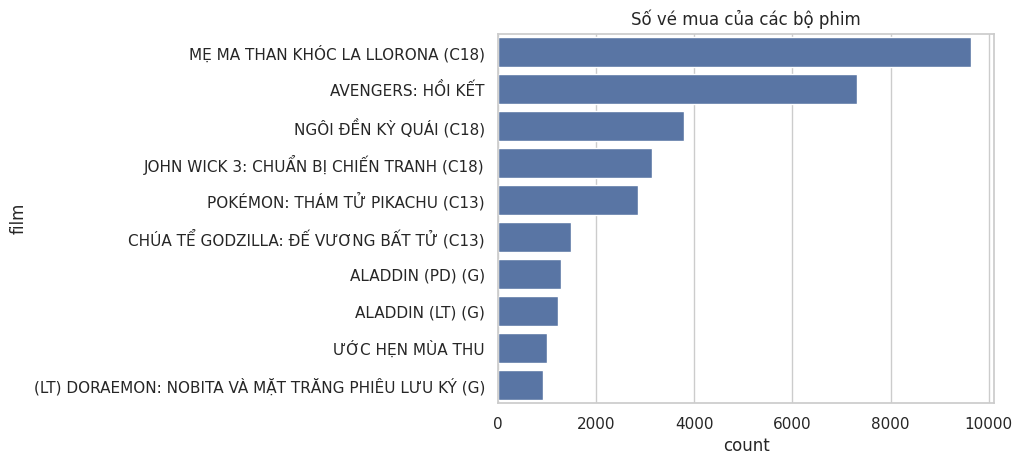

In [ ]:
sns.barplot(x = sample['count'], y =sample['film'])
plt.title('Số vé mua của các bộ phim')
plt.show()

In [ ]:
sample1 = df_Ticket.groupby('cashier')['ticket price'].sum().sort_values(ascending=False).head(6)
sample1 = pd.DataFrame({'cashier': sample1.index, 'ticket price': sample1.values})

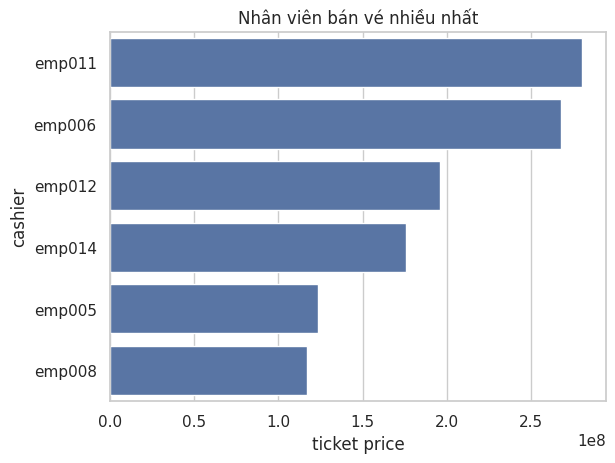

In [ ]:
sns.barplot(sample1,x = "ticket price", y ="cashier")
plt.title('Nhân viên bán vé nhiều nhất')
plt.show()

In [ ]:
df_Ticket['buoi_ngay'] = df_Ticket['time'].apply(lambda x: 'sang' if 6 <= pd.to_datetime(x).hour < 12 else 'chieu' if 12 <= pd.to_datetime(x).hour < 18 else 'toi')

# Hiển thị một số mẫu dữ liệu
print(df_Ticket[['time', 'buoi_ngay']].head())

       time buoi_ngay
0  18:15:00       toi
1  18:15:00       toi
2  20:45:00       toi
3  20:45:00       toi
4  19:30:00       toi


<ipython-input-34-1b557a590f0e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='buoi_ngay', y='ticket price', data=revenue_sum, palette=custom_palette)
<ipython-input-34-1b557a590f0e>:4: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='buoi_ngay', y='ticket price', data=revenue_sum, palette=custom_palette)


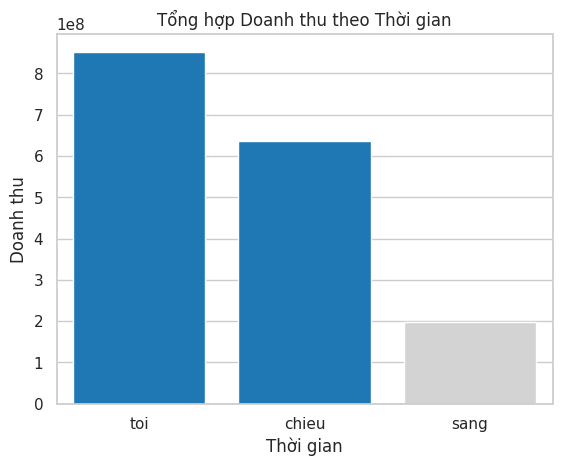

In [ ]:
revenue_sum = df_Ticket.groupby('buoi_ngay')['ticket price'].sum().sort_values(ascending=False).reset_index()
top_two_buois = revenue_sum.nlargest(2, 'ticket price')['buoi_ngay'].tolist()
custom_palette = sns.color_palette(['lightgrey'])
sns.barplot(x='buoi_ngay', y='ticket price', data=revenue_sum, palette=custom_palette)
for i, bar in enumerate(plt.gca().patches):
    if revenue_sum['buoi_ngay'][i] in top_two_buois:
        bar.set_facecolor('#1f78b4')
plt.title('Tổng hợp Doanh thu theo Thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Doanh thu')
plt.show()

In [ ]:
df_Ticket["deltatime"].mean()

0.9159759203773845

**Trung bình các khách hàng sẽ nhận vé trước 0.91 giờ = 55 phút**

<ipython-input-36-6e95d7a9d820>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='day_of_week', x='total', data=revenue_sum_sorted, palette=custom_palette)
<ipython-input-36-6e95d7a9d820>:7: UserWarning: 
The palette list has fewer values (1) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(y='day_of_week', x='total', data=revenue_sum_sorted, palette=custom_palette)


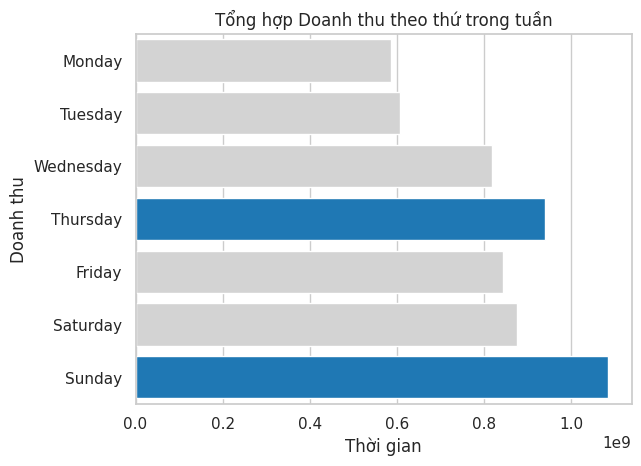

In [ ]:
revenue_sum = df_Ticket.groupby('day_of_week')['total'].sum().reset_index()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
revenue_sum['day_of_week'] = pd.Categorical(revenue_sum['day_of_week'], categories=weekday_order, ordered=True)
revenue_sum_sorted = revenue_sum.sort_values('day_of_week').reset_index(drop=True)
top_two_buois = revenue_sum_sorted.nlargest(2, 'total')['day_of_week'].tolist()
custom_palette = sns.color_palette(['lightgrey'])
sns.barplot(y='day_of_week', x='total', data=revenue_sum_sorted, palette=custom_palette)
for i, bar in enumerate(plt.gca().patches):
    if revenue_sum_sorted['day_of_week'][i] in top_two_buois:
        bar.set_facecolor('#1f78b4')
plt.title('Tổng hợp Doanh thu theo thứ trong tuần')
plt.xlabel('Thời gian')
plt.ylabel('Doanh thu')
plt.show()

In [ ]:
revenue_sum

,day_of_week,total
0,Friday,8.445150e+08
1,Monday,5.872050e+08
2,Saturday,8.762850e+08
3,Sunday,1.084470e+09
4,Thursday,9.406200e+08
5,Tuesday,6.062850e+08
6,Wednesday,8.188250e+08


<ipython-input-38-faf96bd0883b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='week_of_month', y='total', data=revenue_sum, palette=custom_palette)
<ipython-input-38-faf96bd0883b>:4: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='week_of_month', y='total', data=revenue_sum, palette=custom_palette)


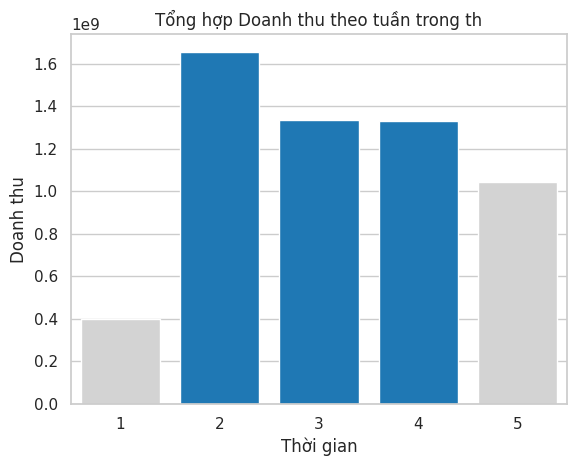

In [ ]:
revenue_sum = df_Ticket.groupby('week_of_month')['total'].sum().reset_index().sort_values('week_of_month')
top_two_buois = revenue_sum.nlargest(3, 'total')['week_of_month'].tolist()
custom_palette = sns.color_palette(['lightgrey'])
sns.barplot(x='week_of_month', y='total', data=revenue_sum, palette=custom_palette)
for i, bar in enumerate(plt.gca().patches):
    if revenue_sum['week_of_month'][i] in top_two_buois:
        bar.set_facecolor('#1f78b4')
plt.title('Tổng hợp Doanh thu theo tuần trong th')
plt.xlabel('Thời gian')
plt.ylabel('Doanh thu')
plt.show()

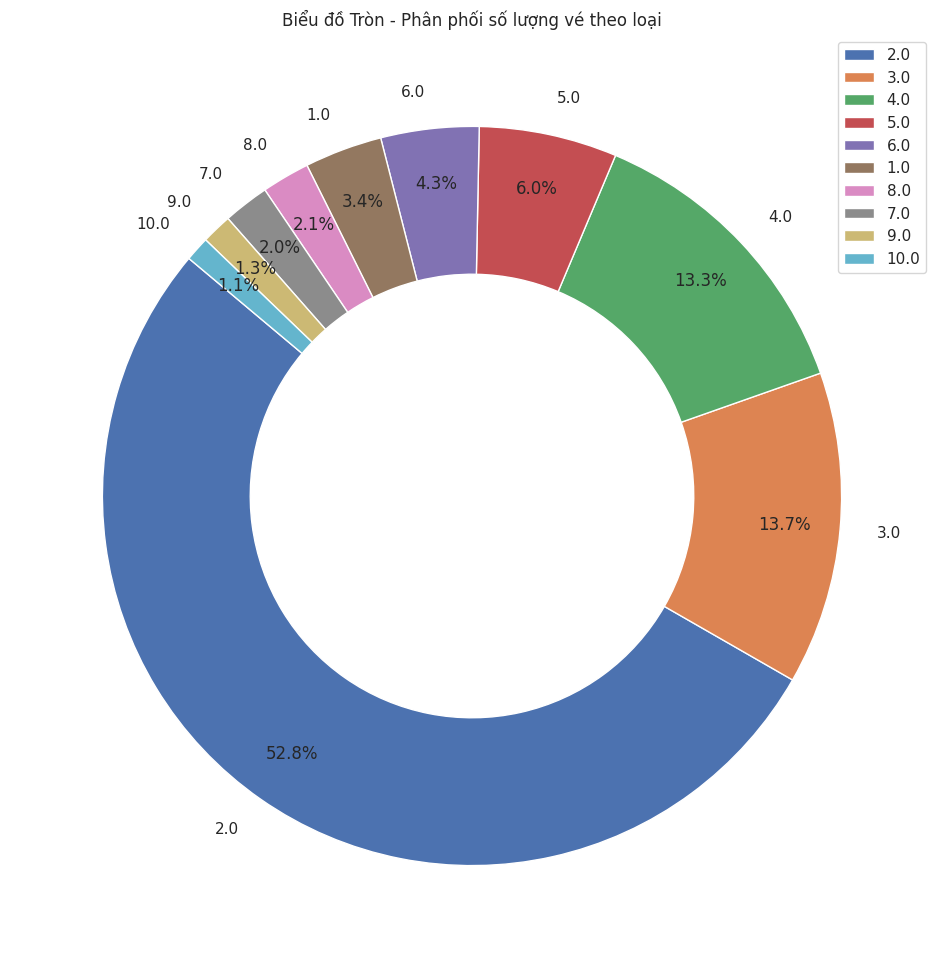

In [ ]:
ticket_counts = df_Ticket['numberticket'].value_counts().head(10)

# Vẽ biểu đồ tròn
plt.figure(figsize=(12, 12))
sns.set(style="whitegrid")
sns.color_palette("pastel")
plt.pie(ticket_counts.values, labels=ticket_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.4),pctdistance=0.85)
plt.legend(loc="upper right")
plt.title('Biểu đồ Tròn - Phân phối số lượng vé theo loại')
plt.show()

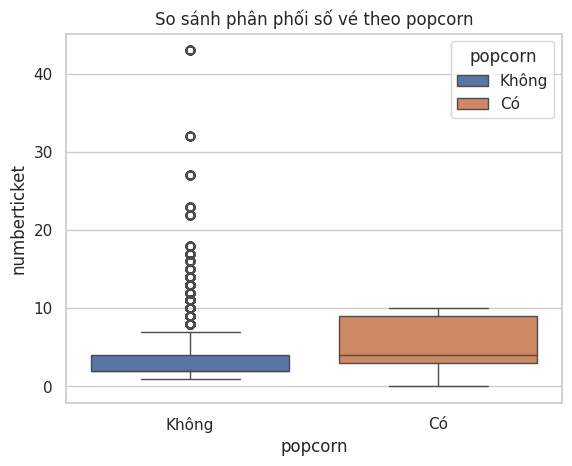

In [ ]:
sns.boxplot(x='popcorn', y='numberticket',hue = 'popcorn', data=df_Ticket)
plt.title('So sánh phân phối số vé theo popcorn')
plt.show()

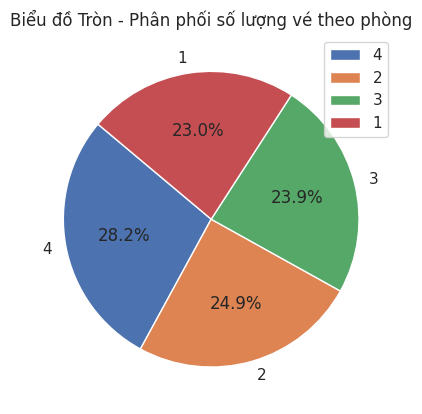

In [ ]:
ticket_counts = df_Ticket['room'].value_counts()
# Vẽ biểu đồ tròn
sns.set(style="whitegrid")
sns.color_palette("pastel")
plt.pie(ticket_counts.values, labels=ticket_counts.index, autopct='%1.1f%%', startangle=140)
plt.legend(loc="upper right")
plt.title('Biểu đồ Tròn - Phân phối số lượng vé theo phòng')
plt.show()

In [80]:
df_Customer['customerid'].isnull().unique()

array([False])

<ipython-input-42-9a79ba9653d0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='job', y='ticket price', data=customer_profit, palette='viridis')


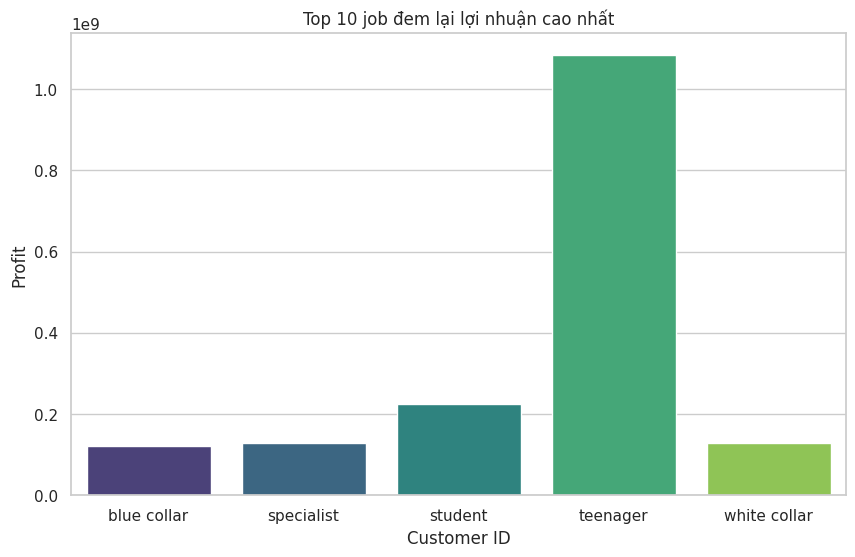

In [ ]:
merged_df = pd.merge(df_Customer, df_Ticket, on='customerid')
customer_profit = merged_df.groupby('job')['ticket price'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='job', y='ticket price', data=customer_profit, palette='viridis')
plt.title('Top 10 job đem lại lợi nhuận cao nhất')
plt.xlabel('Customer ID')
plt.ylabel('Profit')
plt.show()

<ipython-input-43-396af21c0f3b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='customerid', x='total', data=top_10_customers, palette='viridis')


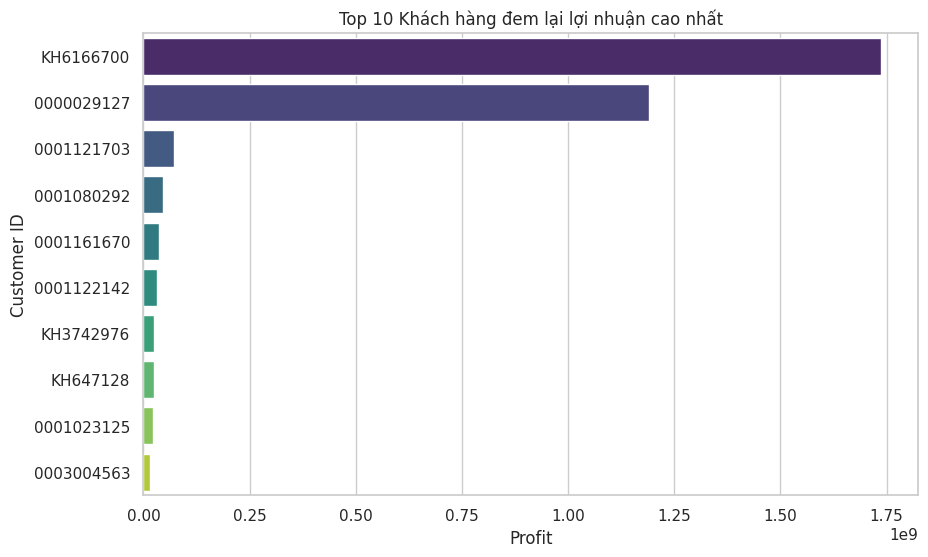

In [ ]:
top_10_customers = df_Ticket.groupby('customerid')['total'].sum().sort_values(ascending=False).head(10).reset_index()

# Lấy 10 khách hàng đem lại lợi nhuận cao nhất

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(y='customerid', x='total', data=top_10_customers, palette='viridis')
plt.title('Top 10 Khách hàng đem lại lợi nhuận cao nhất')
plt.ylabel('Customer ID')
plt.xlabel('Profit')
plt.show()

In [ ]:
(pd.merge( top_10_customers,df_Customer, on='customerid'))[["customerid","Age","job","total"]]

,customerid,Age,job,total
0,KH6166700,5.0,teenager,1.738130e+09
1,0000029127,23.0,teenager,1.191435e+09
2,0001121703,6.0,teenager,7.119000e+07
3,0001080292,41.0,blue collar,4.608000e+07
4,0001161670,18.0,teenager,3.694500e+07
5,0001122142,18.0,teenager,3.280500e+07
6,KH3742976,26.0,student,2.540000e+07
7,KH647128,25.0,student,2.533500e+07
8,0001023125,20.0,teenager,2.178000e+07
9,0003004563,23.0,teenager,1.620000e+07


<ipython-input-45-e375c11bf82b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='slot', x='total', data=top_10_slot, palette='viridis')


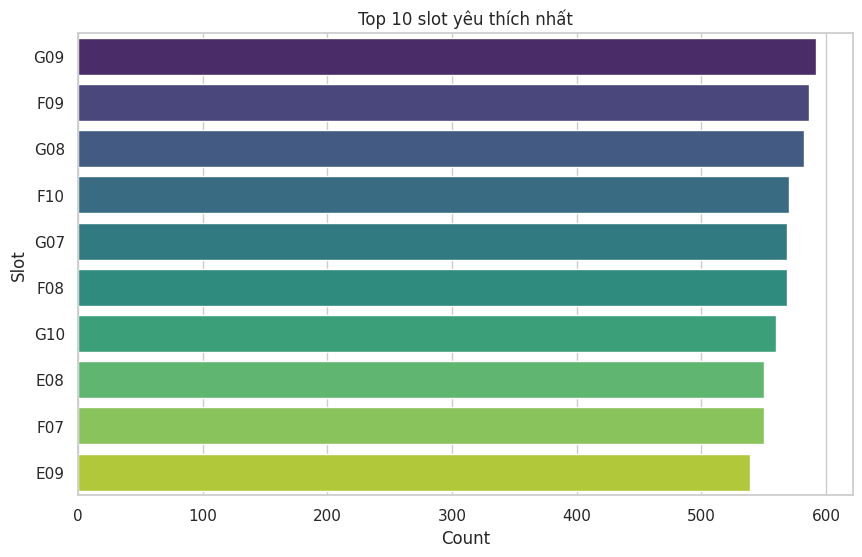

In [ ]:
top_10_slot = df_Ticket.groupby('slot')['total'].count().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(y='slot', x='total', data=top_10_slot, palette='viridis')
plt.title('Top 10 slot yêu thích nhất')
plt.ylabel('Slot')
plt.xlabel('Count')
plt.show()

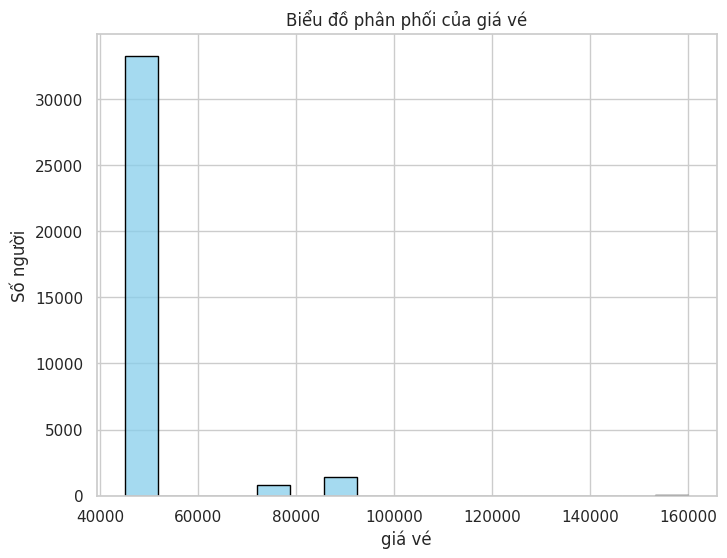

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df_Ticket['ticket price'], color='skyblue', edgecolor='black')
plt.title('Biểu đồ phân phối của giá vé')
plt.xlabel('giá vé')
plt.ylabel('Số người')
plt.show()

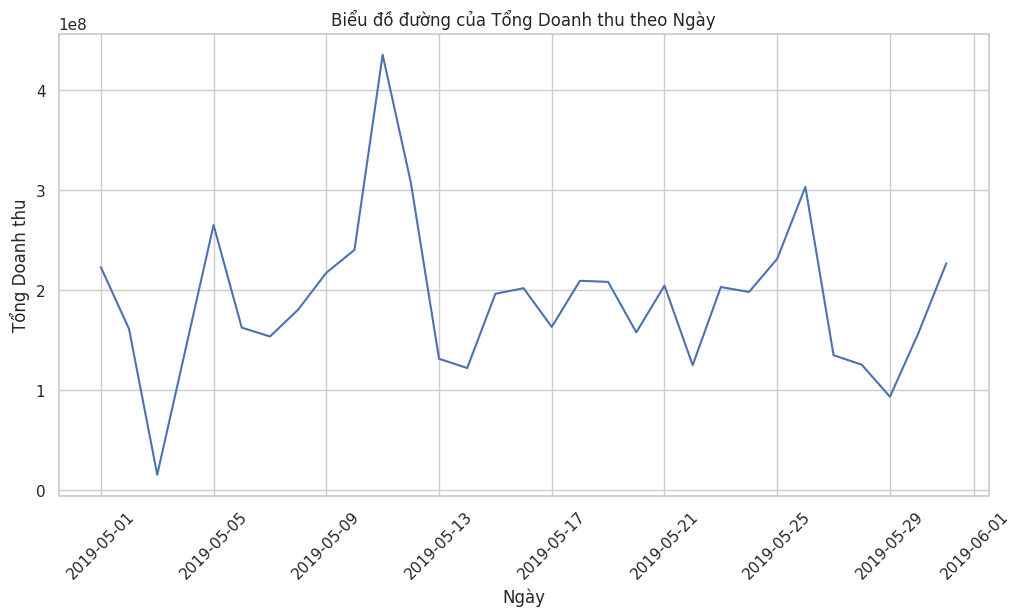

In [ ]:
daily_revenue = df_Ticket.groupby('date')['total'].sum().reset_index()
daily_revenue = daily_revenue.sort_values(by='date')
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='total', data=daily_revenue)
plt.title('Biểu đồ đường của Tổng Doanh thu theo Ngày')
plt.xlabel('Ngày')
plt.ylabel('Tổng Doanh thu')
plt.xticks(rotation=45)
plt.show()

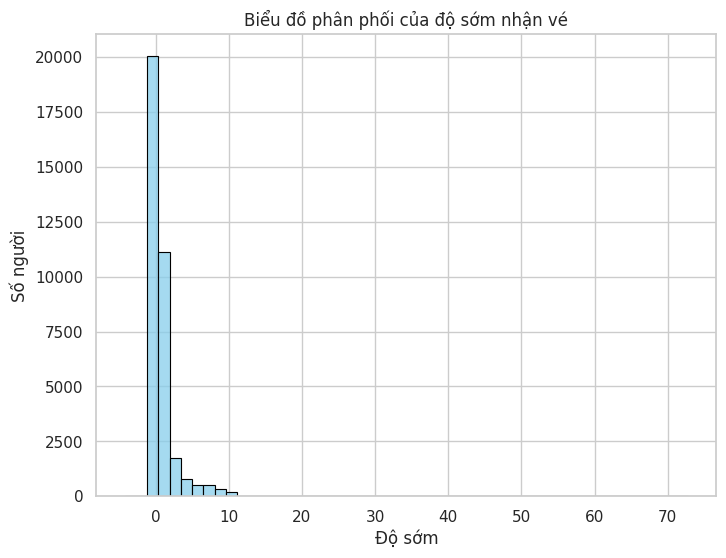

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df_Ticket['deltatime'], color='skyblue', edgecolor='black', bins=50)
plt.title('Biểu đồ phân phối của độ sớm nhận vé')
plt.xlabel('Độ sớm')
plt.ylabel('Số người')
plt.show()

<ipython-input-49-59ddd502b4dd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='industry', x='total', data=customer_profit, palette='viridis')


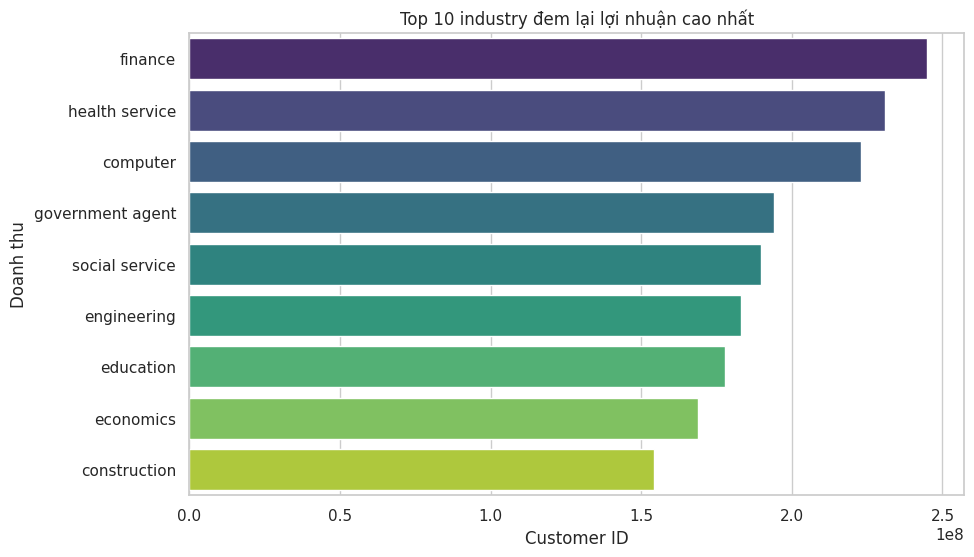

In [ ]:
merged_df = pd.merge(df_Customer, df_Ticket, on='customerid')
customer_profit = merged_df.groupby('industry')['total'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(y='industry', x='total', data=customer_profit, palette='viridis')
plt.title('Top 10 industry đem lại lợi nhuận cao nhất')
plt.xlabel('Customer ID')
plt.ylabel('Doanh thu')
plt.show()

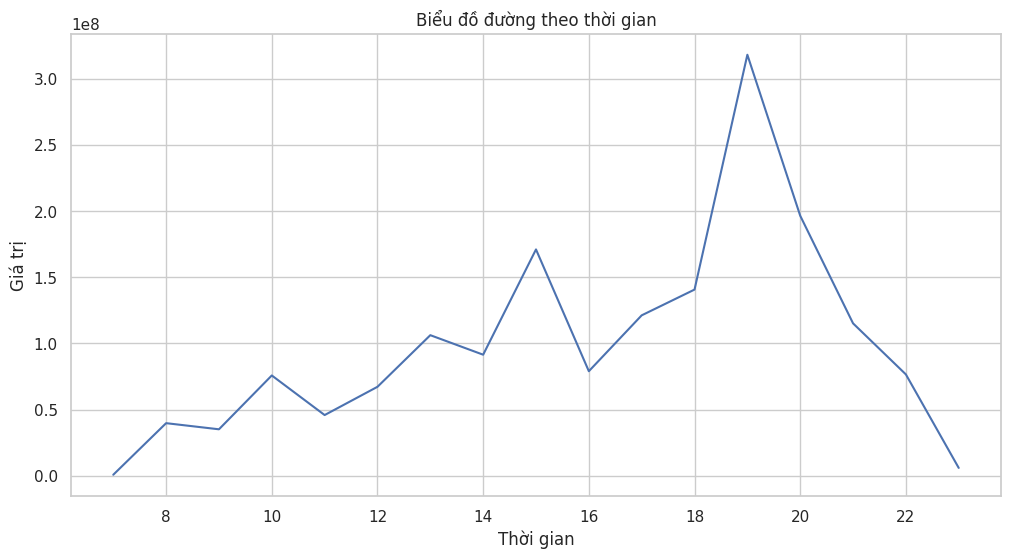

In [ ]:
daily_revenue = df_Ticket.groupby('time')['ticket price'].sum().reset_index()
daily_revenue['time'] = pd.to_datetime(daily_revenue['time'])
daily_revenue['hour'] = daily_revenue['time'].dt.hour
daily_revenue = daily_revenue.groupby('hour')['ticket price'].sum().reset_index()
# Sắp xếp DataFrame theo cột 'time'
df_sorted = daily_revenue.sort_values(by='hour')

# Vẽ biểu đồ đường
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='ticket price', data=df_sorted)  # Thay 'your_column_name' bằng tên cột bạn muốn vẽ
plt.title('Biểu đồ đường theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Giá trị')
plt.show()

<ipython-input-51-90e171b61903>:5: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.lineplot(data=dfhaha, dashes=False, palette=custom_palette)


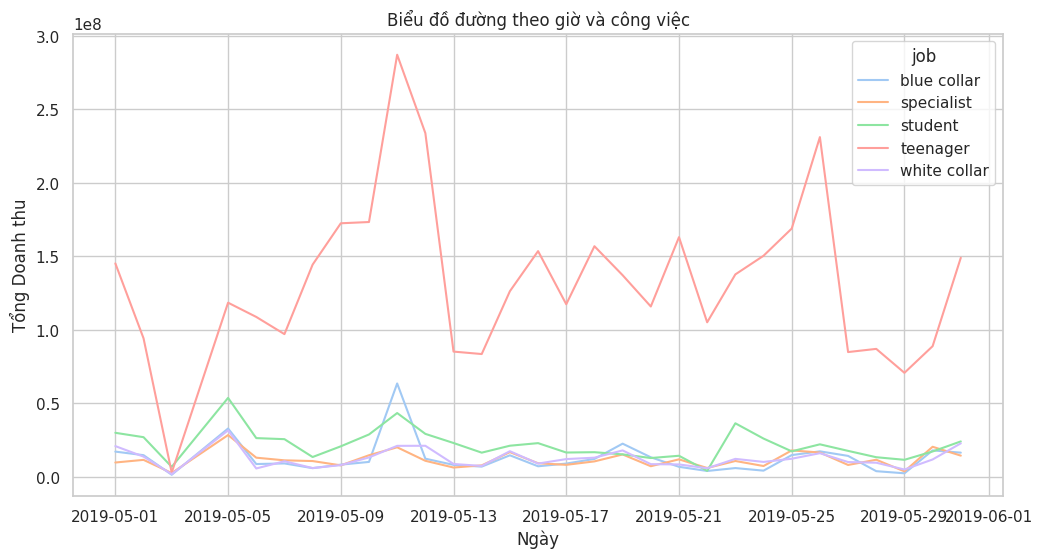

In [ ]:
merged_df = pd.merge(df_Customer, df_Ticket, on='customerid')
dfhaha = merged_df.pivot_table(index='date', columns='job', values='total', aggfunc='sum')
custom_palette = sns.color_palette('pastel')
plt.figure(figsize=(12, 6))
sns.lineplot(data=dfhaha, dashes=False, palette=custom_palette)
plt.title('Biểu đồ đường theo giờ và công việc')
plt.xlabel('Ngày')
plt.ylabel('Tổng Doanh thu')
plt.show()

<ipython-input-52-bd207bcb1fa4>:5: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.lineplot(data=dfhaha, dashes=False, palette=custom_palette)


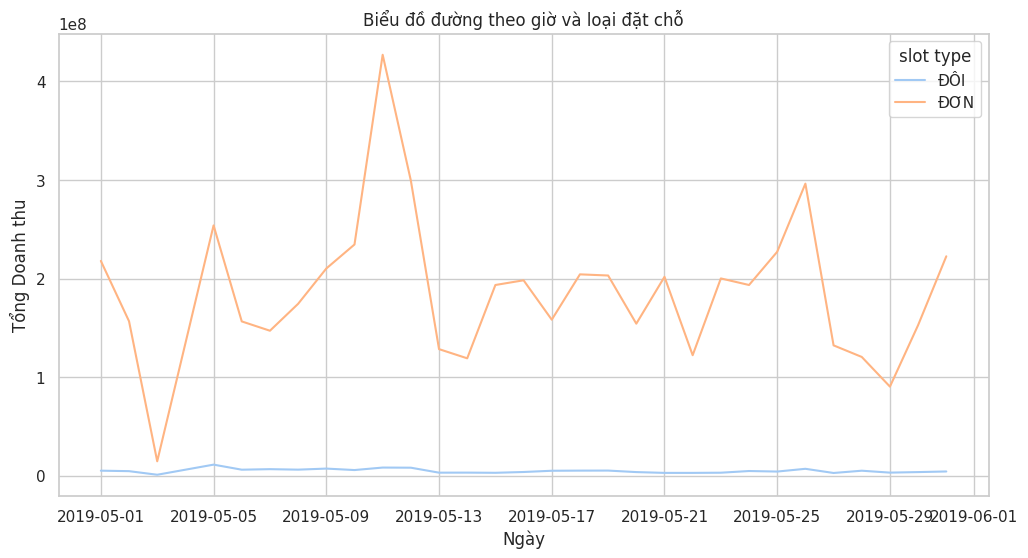

In [ ]:
merged_df = pd.merge(df_Customer, df_Ticket, on='customerid')
dfhaha = merged_df.pivot_table(index='date', columns='slot type', values='total', aggfunc='sum')
custom_palette = sns.color_palette('pastel')
plt.figure(figsize=(12, 6))
sns.lineplot(data=dfhaha, dashes=False, palette=custom_palette)
plt.title('Biểu đồ đường theo giờ và loại đặt chỗ')
plt.xlabel('Ngày')
plt.ylabel('Tổng Doanh thu')
plt.show()

<Axes: xlabel='industry', ylabel='job'>

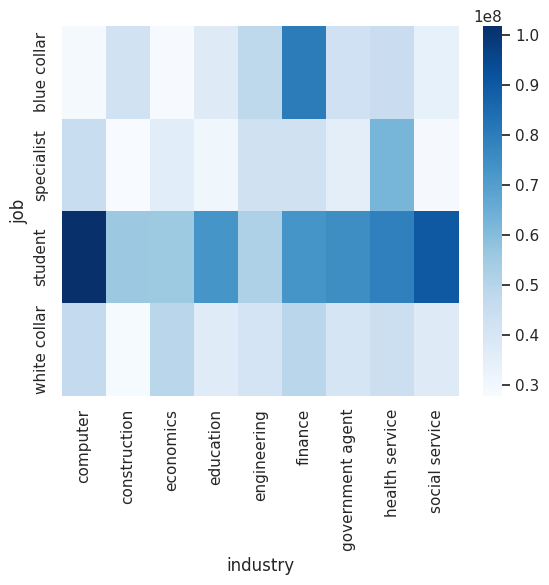

In [ ]:
merged_df = pd.merge(df_Customer, df_Ticket, on='customerid')
dfhaha = merged_df.pivot_table(index='job', columns='industry', values='total', aggfunc='sum')
sns.heatmap(data=dfhaha, cmap='Blues')

In [ ]:
import plotly.express as px
merged_df = pd.merge(df_Customer, df_Ticket, on='customerid')
merged_df = merged_df.groupby(['job', 'industry'])['total'].sum().reset_index()
fig = px.treemap(merged_df, path=['job', 'industry'], values='total', color='total',
                 color_continuous_scale='Viridis', title='Tree Map - Doanh thu theo ngày và công việc')
fig.show()

# **Phân tích dữ liệu film**

In [ ]:
df_Film.head(5)

,show_id,title,release_year,rating,duration
0,s27,X-Men: Dark Phoenix,2019,PG-13,115
1,s165,The Kid Who Would Be King,2019,PG,121
2,s194,Disney My Music Story: Perfume,2019,NaN,53
3,s222,Disney My Music Story: Yoshiki,2019,TV-PG,48
4,s241,Great Shark Chow Down,2019,TV-PG,45


<ipython-input-56-59777b6c27ca>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




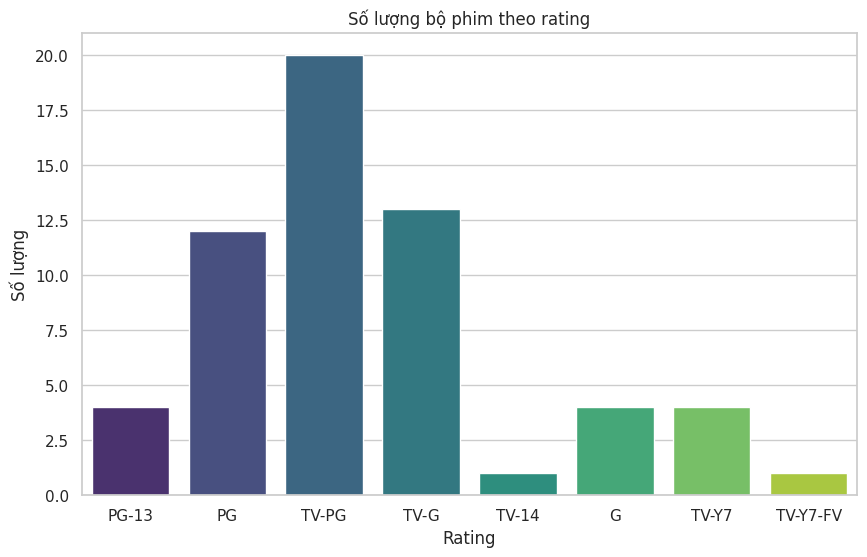

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df_Film, palette='viridis')
plt.title('Số lượng bộ phim theo rating')
plt.xlabel('Rating')
plt.ylabel('Số lượng')
plt.show()

<ipython-input-57-7aabc20d729d>:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-57-7aabc20d729d>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




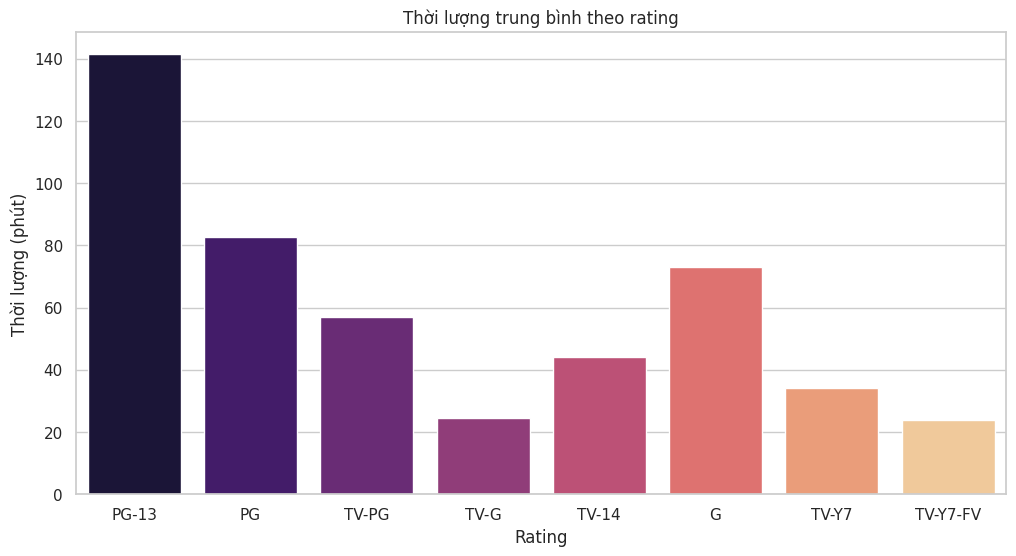

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='rating', y='duration', data=df_Film, palette='magma', ci=None)
plt.title('Thời lượng trung bình theo rating')
plt.xlabel('Rating')
plt.ylabel('Thời lượng (phút)')
plt.show()

<ipython-input-58-48e93c85a4ed>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




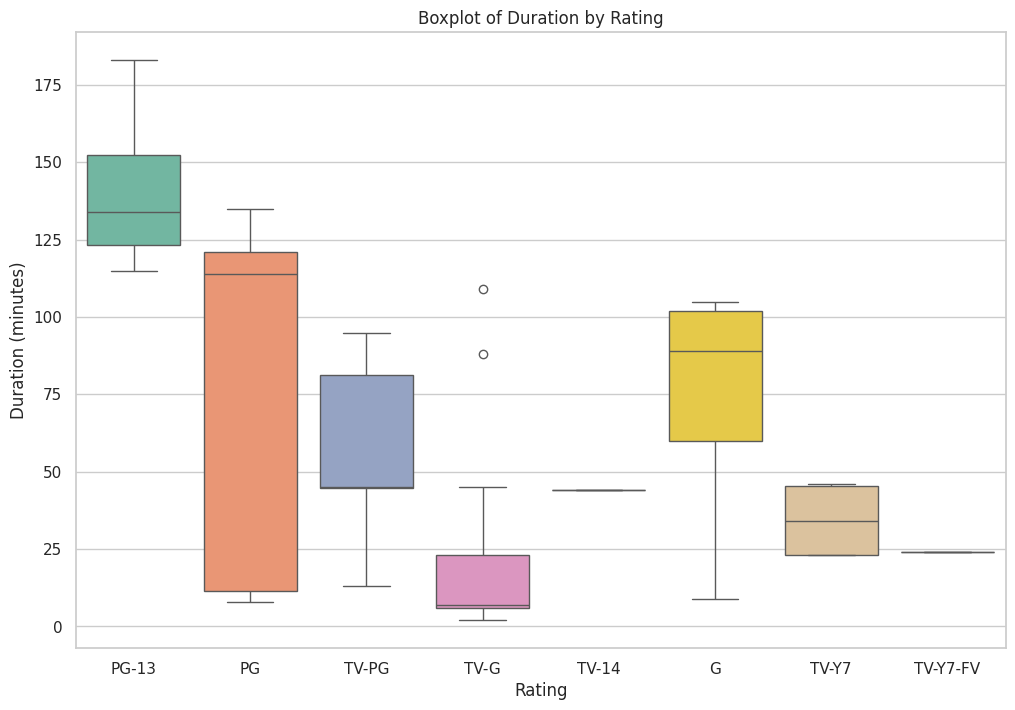

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='rating', y='duration', data=df_Film, palette='Set2')
plt.title('Boxplot of Duration by Rating')
plt.xlabel('Rating')
plt.ylabel('Duration (minutes)')
plt.show()

<ipython-input-59-73685fc83ff7>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




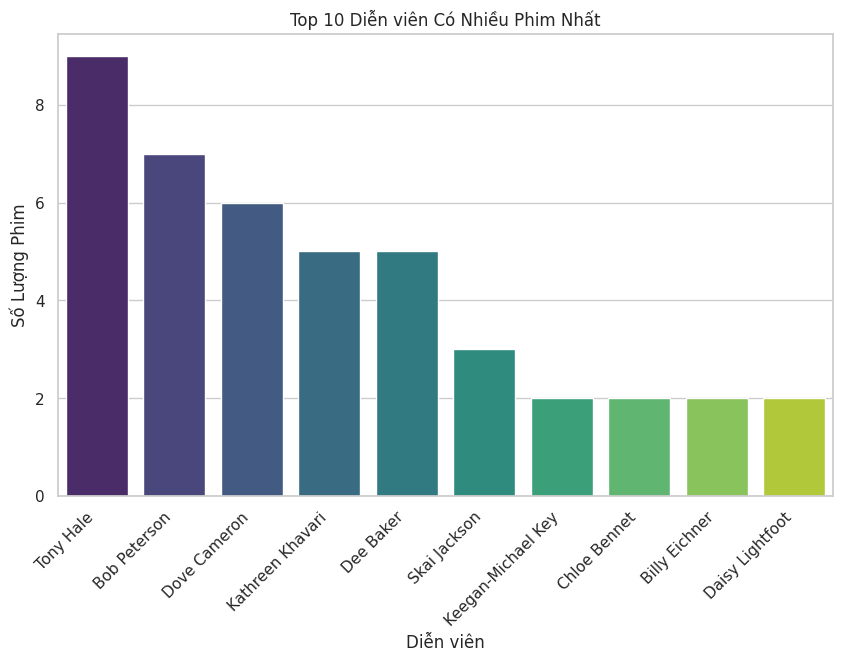

In [ ]:
merged_df = pd.merge(df_Film, df_Author, left_on='show_id', right_on='id', how='left')
top_10_authors = merged_df['author'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_authors.index, y=top_10_authors.values, palette='viridis')
plt.title('Top 10 Diễn viên Có Nhiều Phim Nhất')
plt.xlabel('Diễn viên')
plt.ylabel('Số Lượng Phim')
plt.xticks(rotation=45, ha='right')  # Xoay tên tác giả để dễ đọc
plt.show()

<ipython-input-60-5f0ddafbbe6b>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




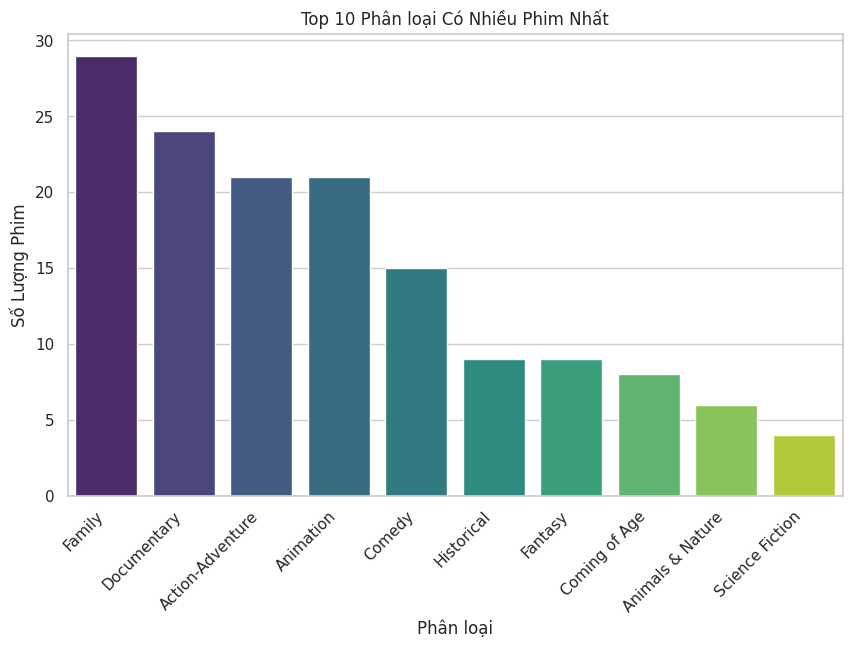

In [ ]:
merged_df = pd.merge(df_Film, df_Category, left_on='show_id', right_on='id', how='left')
top_10_authors = merged_df['Category'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_authors.index, y=top_10_authors.values, palette='viridis')
plt.title('Top 10 Phân loại Có Nhiều Phim Nhất')
plt.xlabel('Phân loại')
plt.ylabel('Số Lượng Phim')
plt.xticks(rotation=45, ha='right')  # Xoay tên tác giả để dễ đọc
plt.show()

<ipython-input-61-2c530c360565>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




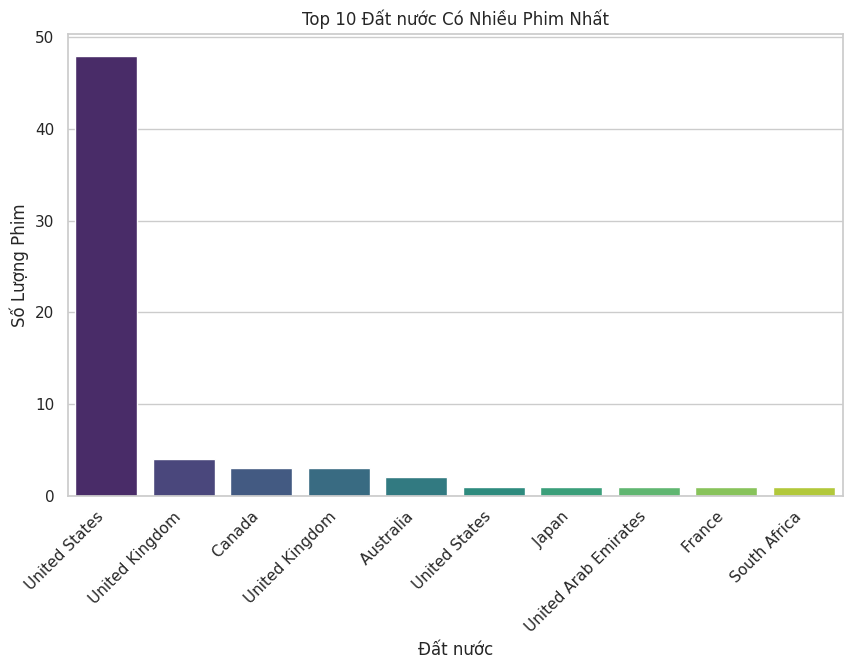

In [ ]:
merged_df = pd.merge(df_Film, df_Country, left_on='show_id', right_on='id', how='left')
top_10_authors = merged_df['Country'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_authors.index, y=top_10_authors.values, palette='viridis')
plt.title('Top 10 Đất nước Có Nhiều Phim Nhất')
plt.xlabel('Đất nước')
plt.ylabel('Số Lượng Phim')
plt.xticks(rotation=45, ha='right')  # Xoay tên tác giả để dễ đọc
plt.show()

<ipython-input-62-5af4665c66f7>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




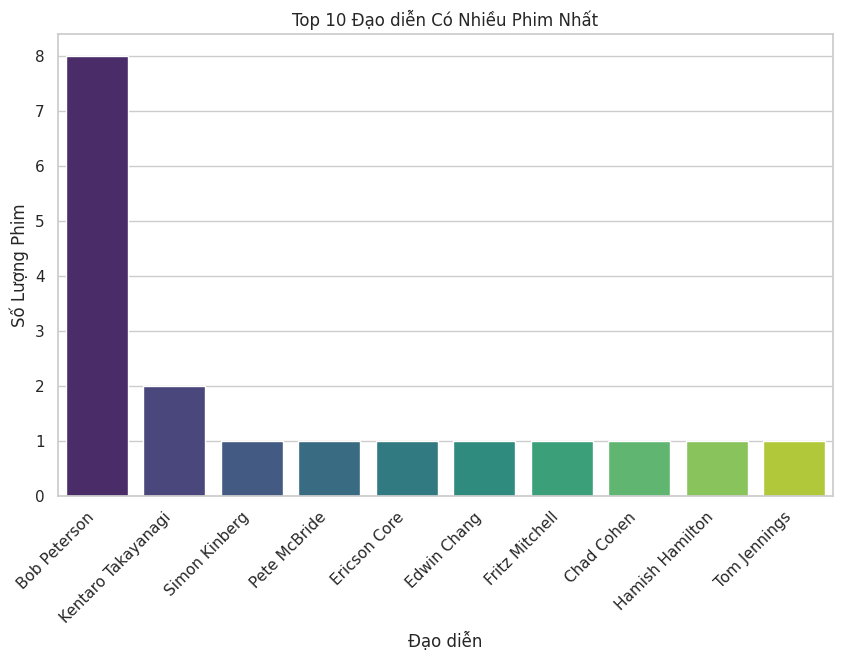

In [ ]:
merged_df = pd.merge(df_Film, df_Director, left_on='show_id', right_on='id', how='left')
top_10_authors = merged_df['Director'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_authors.index, y=top_10_authors.values, palette='viridis')
plt.title('Top 10 Đạo diễn Có Nhiều Phim Nhất')
plt.xlabel('Đạo diễn')
plt.ylabel('Số Lượng Phim')
plt.xticks(rotation=45, ha='right')  # Xoay tên tác giả để dễ đọc
plt.show()

In [ ]:
df_Category["Category"].unique()

array(['Action-Adventure', 'Family', 'Science Fiction', 'Coming of Age',
       'Biographical', 'Documentary', 'Music', 'Animals & Nature',
       'Historical', 'Fantasy', 'Animation', 'Comedy', 'Musical', 'Drama',
       'Superhero', 'Concert Film', 'Dance', 'Buddy'], dtype=object)

In [ ]:
len(df_Ticket[df_Ticket['popcorn']== "Có"])/len(df_Ticket)

0.0025652590629757005